**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Loading packages
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [3]:
from exam_2024 import EconomicsModel

# Using a class to import the model function
model = EconomicsModel()

# Check market clearing conditions for p1 and p2 in the specified ranges
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)
w = 1.0

#storing the market clearing results
estimation_results = []

#making a loop for p1 and p1 through their respective possible values
for p1 in p1_values:
    for p2 in p2_values:
        result_market_clearing = model.market_clearing(p1, p2, w)
        estimation_results.append((p1, p2, result_market_clearing))

# Print the 11 first market clearing results
for idx, (p1, p2, result) in enumerate(estimation_results[:11]):
    "Printing out the first 11 market clearing results given the price of firm 1 and 2."
    "Labor market is the difference between the labor supplied by the consumer and the labor demanded by the firms." 
    "Good market 1 and 2 is the difference between the consumption and the output of the firms."
    print(f"Estimation {idx + 1}: p1 = {p1:.3f} | p2 = {p2:.3f} | Labor Market = {result[0]:.3f} | Good Market 1 = {result[1]:.3f} | Good Market 2 = {result[2]:.3f}")


Estimation 1: p1 = 0.100 | p2 = 0.100 | Labor Market = 0.993 | Good Market 1 = 2.960 | Good Market 2 = 6.973
Estimation 2: p1 = 0.100 | p2 = 0.311 | Labor Market = 0.964 | Good Market 1 = 3.004 | Good Market 2 = 2.135
Estimation 3: p1 = 0.100 | p2 = 0.522 | Labor Market = 0.906 | Good Market 1 = 3.093 | Good Market 2 = 1.143
Estimation 4: p1 = 0.100 | p2 = 0.733 | Labor Market = 0.819 | Good Market 1 = 3.230 | Good Market 2 = 0.677
Estimation 5: p1 = 0.100 | p2 = 0.944 | Labor Market = 0.705 | Good Market 1 = 3.417 | Good Market 2 = 0.384
Estimation 6: p1 = 0.100 | p2 = 1.156 | Labor Market = 0.563 | Good Market 1 = 3.658 | Good Market 2 = 0.171
Estimation 7: p1 = 0.100 | p2 = 1.367 | Labor Market = 0.396 | Good Market 1 = 3.955 | Good Market 2 = 0.000
Estimation 8: p1 = 0.100 | p2 = 1.578 | Labor Market = 0.204 | Good Market 1 = 4.312 | Good Market 2 = -0.144
Estimation 9: p1 = 0.100 | p2 = 1.789 | Labor Market = -0.011 | Good Market 1 = 4.733 | Good Market 2 = -0.271
Estimation 10: p

The results above show the price for firm 1 and firm 2 respectively as well as whether the labor market expericens a surpluss or defficience of labor. Aditionally, it checks for whether the goods markets clear ie. whether there are discreptencies in output and consumption of either good 1 or 2.

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [4]:
# Question 2 essentially uses the results from question 1 to find the market clearing prices p1 and p2
from exam_2024 import EconomicsModel

# Using a class to import the model function
model = EconomicsModel()

# Initialize the parameters
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)
w = 1.0

# storing results
market_clearing_results = []

# drawing through the possible values of p1 and p2 from question 1
for p1 in p1_values:
    for p2 in p2_values:
        result = model.market_clearing(p1, p2, w)
        market_clearing_results.append((p1, p2, result))


# Finding the best market clearing prices
best_p1, best_p2, best_labor_market, best_good_market_1, best_good_market_2 = model.find_best_market_clearing(market_clearing_results)

# Print of the best prices, as well as a look at whehter the markets have cleared.
print(f"Equilibrium prices found: p1 = {best_p1:.3f}, p2 = {best_p2:.3f}")
print(f"Market clearing values:")
print(f"Labor Market = {best_labor_market:<10f} | Good Market 1 = {best_good_market_1:<10f} | Good Market 2 = {best_good_market_2:<10f}")

Equilibrium prices found: p1 = 0.944, p2 = 1.578
Market clearing values:
Labor Market = -0.061808  | Good Market 1 = 0.045184   | Good Market 2 = -0.066221 


Given the above values, it is found that with a price of 0.944 for firm 1 and 1.578 for firm 2 the market clears as much as possible. \
The labor and goods markets are closed to being cleared, but don't clear perfectly. 

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

The results provide an insight to what the optimal tax rate would be to maximize social wefare. \
Here a tax rate on carbon of 23 percentage on good 2, gives the optimal amount of utility. \
The market is again close to clearing, but does not clear perfectly. It actually clears less than in question 2, essentially making people worse off due to this tax.


In [5]:
from exam_2024 import EconomicsModel

# Create an instance of the EconomicsModel class
model = EconomicsModel()

# Finding the optimal values for tau and T and the corresponding prices and market clearing prices
optimal_tau, optimal_T, equilibrium_results = model.find_optimal_tau()

# Results from the model
print(f"Optimal tau: {optimal_tau:.3f}")
print(f"Implied optimal T: {optimal_T:.3f}")
print(f"Equilibrium prices: p1 = {equilibrium_results['p1']:.3f}, p2 = {equilibrium_results['p2']:.3f}")
print(f"Market clearing values:")
print(f"Labor Market = {equilibrium_results['labor_market']:.6f}")
print(f"Good Market 1 = {equilibrium_results['good_market_1']:.6f}")
print(f"Good Market 2 = {equilibrium_results['good_market_2']:.6f}")
print(f"Utility: {model.consumer_utility(equilibrium_results['c1_star'], equilibrium_results['c2_star'], model.par.alpha, model.par.nu, equilibrium_results['ell_star'], model.par.epsilon):.6f}")


Optimal tau: 0.236
Implied optimal T: 0.169
Equilibrium prices: p1 = 0.944, p2 = 1.367
Market clearing values:
Labor Market = 0.090952
Good Market 1 = 0.048691
Good Market 2 = 0.032904
Utility: -0.587999


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [6]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [7]:
# Setting the seed for reproducibility of the error term, calculating the error terms using the parameters above
np.random.seed(1703)
E = np.random.normal(0, par.sigma, par.K)

# Initialize a list of lists to store utility values for each v
utilities = [[] for _ in par.v]

# Calculating utilities for each value of v
for e in E:
    for i, v in enumerate(par.v):
        utilities[i].append(v + e)

# Calculate the means and round them
mean_utilities = [round(np.mean(utility), 3) for utility in utilities]

print("Mean utilities:")
print(u"v\u2081", "=", mean_utilities[0])
print(u"v\u2082", "=", mean_utilities[1])
print(u"v\u2083", "=", mean_utilities[2])

Mean utilities:
v₁ = 1.022
v₂ = 2.022
v₃ = 3.022


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

In [8]:
# Setting the seed for reproducibility of the error term, calculating the error terms using the parameters above
np.random.seed(1703)

# Initialize a list to store utility values for each graduate and their friends
graduate_friend_utilities = []

# Simulate utilities for each graduate's friends
for i in range(par.N):  # For each graduate
    friends_utilities = []  # List to hold utilities for all friends of graduate i
    for f in range(par.F[i]):  # For each friend of graduate i
        # Simulate utilities from normal distribution centered on par.v with noise par.sigma
        utilities = np.random.normal(par.v, par.sigma, par.J)
        # Append the simulated utilities to the friends' list
        friends_utilities.append(utilities)
    # Append the friends' utilities list to the main list
    graduate_friend_utilities.append(friends_utilities)

# Calculate mean utilities across friends for each graduate if needed
mean_utilities = [np.mean(friend_utilities, axis=0) for friend_utilities in graduate_friend_utilities]

# Determine the maximum utility and corresponding career path for each graduate
chosen_careers = []
for i, utilities in enumerate(mean_utilities):
    max_index = np.argmax(utilities)
    chosen_careers.append((max_index, utilities[max_index]))

# Print the chosen career paths and their expected utilities
for i, (career_index, utility) in enumerate(chosen_careers):
    print(f"Graduate {i + 1} would choose career path {career_index + 1} with an expected utility of {utility:.3f}")

# Initialize a list of lists to store utility values for each v
choice_utilities = []

# Calculating realized utilities for each career choice and single error draws
for i, career in enumerate(chosen_careers):
    v, exp = career
    utilities = np.mean(np.random.normal(v + 1, par.sigma, 1))
    choice_utilities.append(utilities)

# Printing realized utilities for each career choice
for i, utility in enumerate(choice_utilities):
    print("With this career choice and in the present scenario, graduate", i + 1, "would realize a utility of", utility)

Graduate 1 would choose career path 1 with an expected utility of 4.147
Graduate 2 would choose career path 3 with an expected utility of 2.523
Graduate 3 would choose career path 3 with an expected utility of 3.562
Graduate 4 would choose career path 3 with an expected utility of 2.971
Graduate 5 would choose career path 2 with an expected utility of 2.751
Graduate 6 would choose career path 3 with an expected utility of 1.880
Graduate 7 would choose career path 3 with an expected utility of 3.297
Graduate 8 would choose career path 3 with an expected utility of 3.263
Graduate 9 would choose career path 3 with an expected utility of 3.812
Graduate 10 would choose career path 3 with an expected utility of 3.555
With this career choice and in the present scenario, graduate 1 would realize a utility of 0.575814671343641
With this career choice and in the present scenario, graduate 2 would realize a utility of 5.751301573122989
With this career choice and in the present scenario, graduate

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average Expected expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [9]:
# Setting the seed for reproducibility of the error term, calculating the error terms using the parameters above
np.random.seed(1703)

# Initialize arrays to store the utilities
utilities_all_simulations = np.zeros((par.N, par.K, par.J))

# Simulate utilities for each graduate's friends across all simulations
for i in range(par.N):
    num_friends = par.F[i]
    # Simulate utilities from normal distribution centered on par.v with noise par.sigma, for three dimensions (number of simulations, number of friends, number of career paths)
    friends_utilities = np.random.normal(par.v, par.sigma, (par.K, num_friends, par.J))
    # Calculate mean utility for each career path from friends' reports
    mean_utilities = np.mean(friends_utilities, axis=1)
    # Store the average utilities
    utilities_all_simulations[i] = mean_utilities

# Determine the best career path for each graduate in each simulation
chosen_careers_all_simulations = np.argmax(utilities_all_simulations, axis=2)

# Simulate realized utilities for each graduate's chosen career path across all simulations
realized_utilities = np.zeros((par.N, par.K))
expected_utilities = np.zeros((par.N, par.K))
for i in range(par.N):
    for k in range(par.K):
        best_career = chosen_careers_all_simulations[i, k]
        # Calculate the expected utility for the chosen career path in this simulation
        expected_utilities[i, k] = par.v[best_career]
        # Simulate the realized utility for the chosen career path in this simulation
        realized_utilities[i, k] = np.random.normal(par.v[best_career], par.sigma)

# Calculate the mean expected and realized utilities across all simulations for each graduate
mean_expected_utilities = np.mean(expected_utilities, axis=1)
mean_realized_utilities = np.mean(realized_utilities, axis=1)

# Print the chosen career paths and their expected utilities for the first simulation
print("Choices from the first simulation (for example):")
for i in range(par.N):
    career_index = chosen_careers_all_simulations[i, 0]
    expected_utility = utilities_all_simulations[i, 0, career_index]
    print(f"Graduate {i + 1} would choose career path {career_index + 1} with an expected utility of {expected_utility:.3f} in the first simulation")

# Print the mean expected and realized utilities for each graduate
print("\nAverage expected and realized utilities across all simulations:")
for i in range(par.N):
    print(f"Graduate {i + 1} would have an average expected utility of {mean_expected_utilities[i]:.3f} and realize an average utility of {mean_realized_utilities[i]:.3f}")

Choices from the first simulation (for example):
Graduate 1 would choose career path 1 with an expected utility of 4.147 in the first simulation
Graduate 2 would choose career path 2 with an expected utility of 3.713 in the first simulation
Graduate 3 would choose career path 3 with an expected utility of 3.612 in the first simulation
Graduate 4 would choose career path 3 with an expected utility of 3.377 in the first simulation
Graduate 5 would choose career path 3 with an expected utility of 1.975 in the first simulation
Graduate 6 would choose career path 3 with an expected utility of 2.771 in the first simulation
Graduate 7 would choose career path 3 with an expected utility of 2.040 in the first simulation
Graduate 8 would choose career path 3 with an expected utility of 2.967 in the first simulation
Graduate 9 would choose career path 3 with an expected utility of 2.284 in the first simulation
Graduate 10 would choose career path 1 with an expected utility of 2.154 in the first s

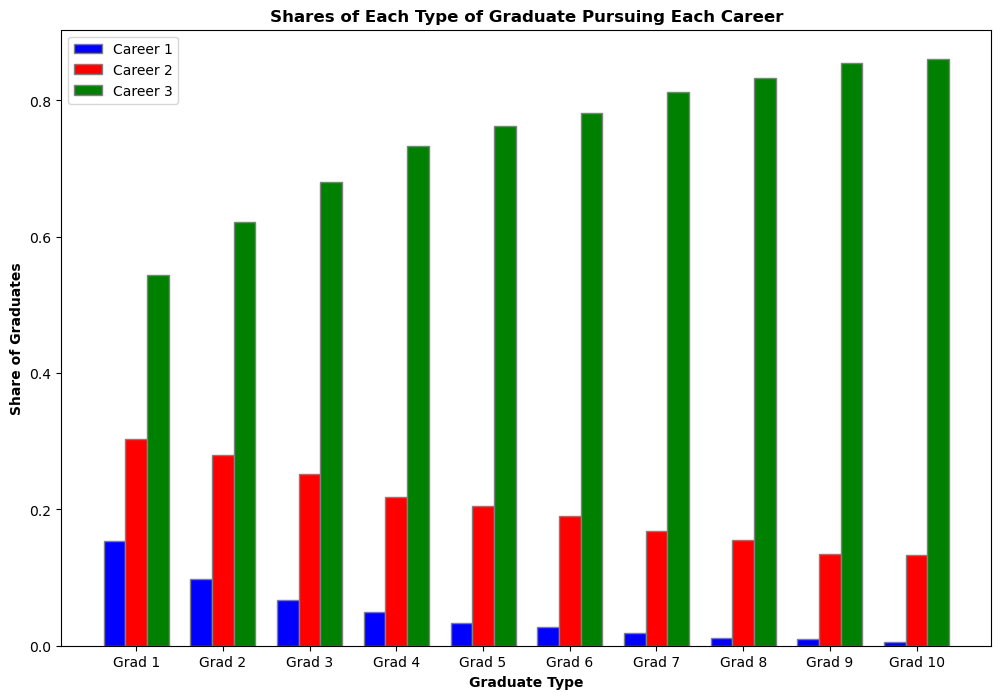

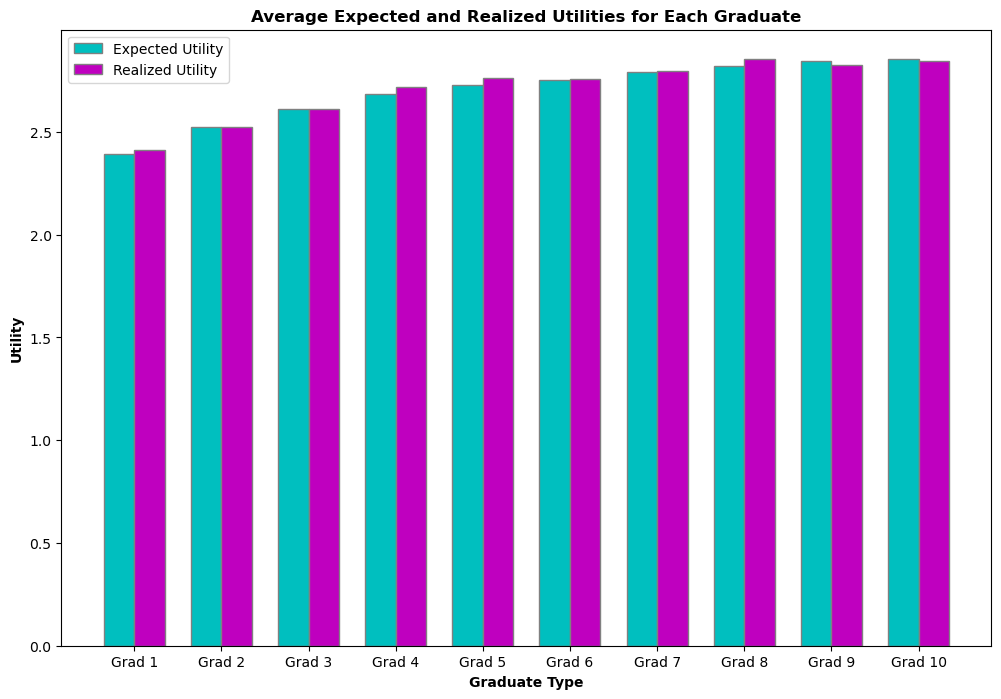

In [10]:
# Calculate the shares of each career path chosen by graduates
career_shares = np.zeros((par.N, par.J))
for i in range(par.N):
    for j in range(par.J):
        career_shares[i, j] = np.mean(chosen_careers_all_simulations[i] == j)

# Create bar charts

# Bar chart for career shares
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.25
r1 = np.arange(par.N)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

ax.bar(r1, career_shares[:, 0], color='b', width=bar_width, edgecolor='grey', label='Career 1')
ax.bar(r2, career_shares[:, 1], color='r', width=bar_width, edgecolor='grey', label='Career 2')
ax.bar(r3, career_shares[:, 2], color='g', width=bar_width, edgecolor='grey', label='Career 3')

ax.set_xlabel('Graduate Type', fontweight='bold')
ax.set_ylabel('Share of Graduates', fontweight='bold')
ax.set_title('Shares of Each Type of Graduate Pursuing Each Career', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(par.N)])
ax.set_xticklabels([f'Grad {i+1}' for i in range(par.N)])
ax.legend()

# Display the bar chart for career shares
plt.show()

# Bar chart for expected and realized utilities
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
r1 = np.arange(par.N)
r2 = [x + bar_width for x in r1]

ax.bar(r1, mean_expected_utilities, color='c', width=bar_width, edgecolor='grey', label='Expected Utility')
ax.bar(r2, mean_realized_utilities, color='m', width=bar_width, edgecolor='grey', label='Realized Utility')

ax.set_xlabel('Graduate Type', fontweight='bold')
ax.set_ylabel('Utility', fontweight='bold')
ax.set_title('Average Expected and Realized Utilities for Each Graduate', fontweight='bold')
ax.set_xticks([r + bar_width / 2 for r in range(par.N)])
ax.set_xticklabels([f'Grad {i+1}' for i in range(par.N)])
ax.legend()

# Display the bar chart for expected and realized utilities
plt.show()

Quite intuitively, the plots show that graduates with a smaller social network and hence less information to draw on more frequently make a suboptimal career choice. As the size of graduates' social networks increases, more and more graduates tend to choose career path three, with the highest payoffs, on average.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average Expected expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

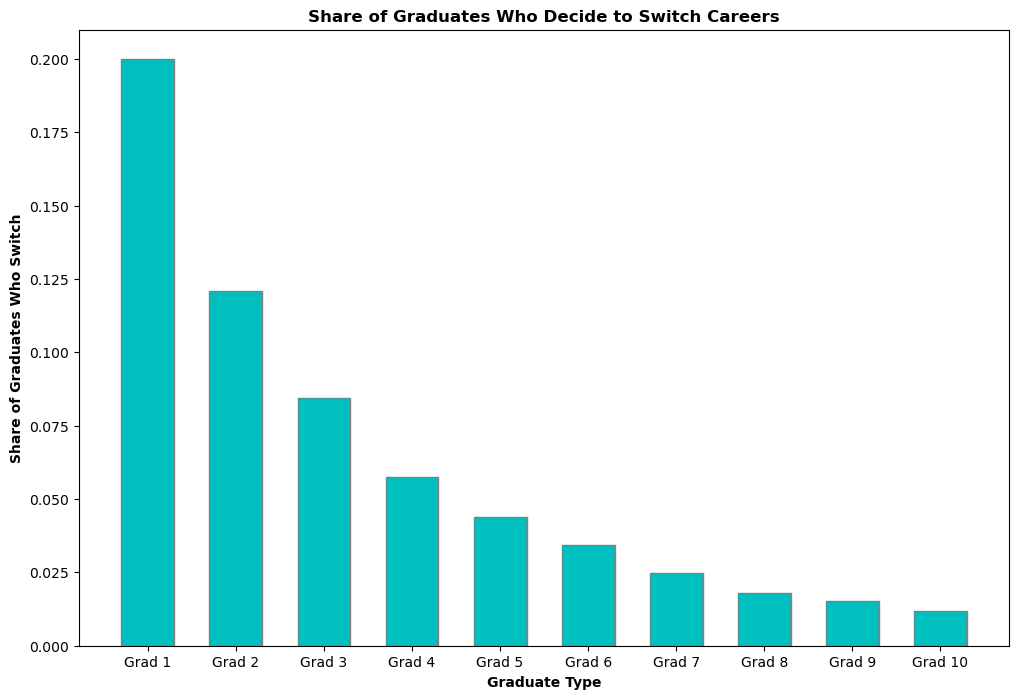

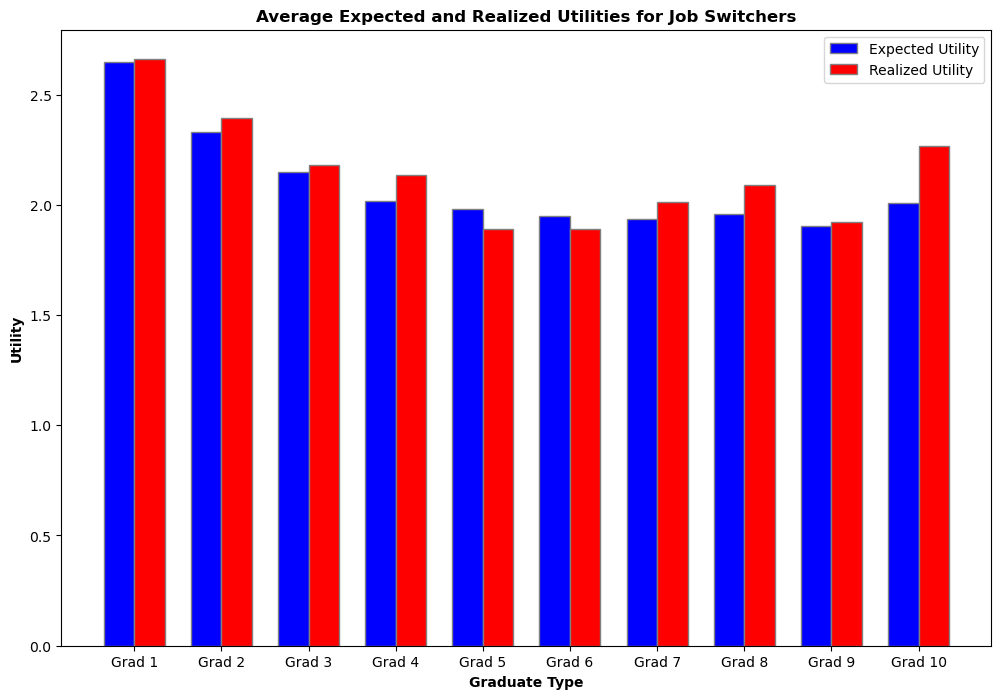

In [11]:
# Setting the seed for reproducibility of the error term, calculating the error terms using the parameters above
np.random.seed(1703)

# Calculate the initial payoffs and decide on switching
initial_payoffs = np.zeros((par.N, par.K))
switch_decisions = np.zeros((par.N, par.K), dtype=bool)
switch_payoffs = np.zeros((par.N, par.K))
for i in range(par.N):
    for k in range(par.K):
        best_career = chosen_careers_all_simulations[i, k]
        initial_payoff = par.v[best_career]
        initial_payoffs[i, k] = initial_payoff
        
        # Calculate the expected payoffs for switching
        switch_options = [j for j in range(par.J) if j != best_career]
        switch_payoffs_options = []
        for option in switch_options:
            switch_payoff = np.mean(utilities_all_simulations[i, k, option]) - par.c
            switch_payoffs_options.append(switch_payoff)
        
        # Determine if switching is beneficial
        max_switch_payoff = max(switch_payoffs_options)
        if max_switch_payoff > initial_payoff:
            switch_decisions[i, k] = True
            switch_payoffs[i, k] = max_switch_payoff
        else:
            switch_payoffs[i, k] = initial_payoff

# Calculate shares and average utilities
switch_shares = np.mean(switch_decisions, axis=1)
average_expected_utilities_switchers = np.zeros(par.N)
average_realized_utilities_switchers = np.zeros(par.N)
for i in range(par.N):
    if np.any(switch_decisions[i]):
        switch_indices = np.where(switch_decisions[i])[0]
        average_expected_utilities_switchers[i] = np.mean(switch_payoffs[i, switch_indices])
        average_realized_utilities_switchers[i] = np.mean(switch_payoffs[i, switch_indices] + np.random.normal(0, par.sigma, len(switch_indices)))

# Plotting shares of graduates who decide to switch
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(np.arange(par.N), switch_shares, color='c', width=0.6, edgecolor='grey')
ax.set_xlabel('Graduate Type', fontweight='bold')
ax.set_ylabel('Share of Graduates Who Switch', fontweight='bold')
ax.set_title('Share of Graduates Who Decide to Switch Careers', fontweight='bold')
ax.set_xticks(np.arange(par.N))
ax.set_xticklabels([f'Grad {i+1}' for i in range(par.N)])
plt.show()

# Plotting average expected and realized utilities for job switchers
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
r1 = np.arange(par.N)
r2 = [x + bar_width for x in r1]

ax.bar(r1, average_expected_utilities_switchers, color='b', width=bar_width, edgecolor='grey', label='Expected Utility')
ax.bar(r2, average_realized_utilities_switchers, color='r', width=bar_width, edgecolor='grey', label='Realized Utility')

ax.set_xlabel('Graduate Type', fontweight='bold')
ax.set_ylabel('Utility', fontweight='bold')
ax.set_title('Average Expected and Realized Utilities for Job Switchers', fontweight='bold')
ax.set_xticks([r + bar_width / 2 for r in range(par.N)])
ax.set_xticklabels([f'Grad {i+1}' for i in range(par.N)])
ax.legend()
plt.show()

Again, the results confirm prior expectations. The higher share of suboptimal career choices among graduates with a smaller number of friends and therefore suboptimal information discover that their information was incorrect and choose to switch career paths. Across all simulations, average expected and realized utilities are largely similar.

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [12]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [13]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [14]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [15]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [16]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [17]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [18]:
# write your answer here